In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

# Task 1

In [2]:
# TASK 1.1

rng = lambda: np.random.random()
dist = lambda neuron1, neuron2: np.sqrt((neuron1[0] - neuron2[0])**2 + (neuron1[1] - neuron2[1])**2)
p = lambda d, alpha, beta : beta * np.exp(-alpha * d)
p2 = lambda d, alpha : np.exp(-alpha * d)

def KaiserHilgetag(alpha = 1, beta = 1, N = 100):
    
    adjacency = np.zeros((N, N))
    neurons = [(rng(), rng())]
    while(len(neurons) < N):
        new_neuron = (rng(), rng())
        dists = [dist(new_neuron, n) for n in neurons]
        neighbours = [i for i, d in enumerate(dists) if random.random() < p(d, alpha, beta)]
        if len(neighbours) > 0:
            neurons.append(new_neuron)
            for i in neighbours:
                adjacency[i, len(neurons)-1] = 1
                adjacency[len(neurons)-1, i] = 1

    return adjacency, neurons


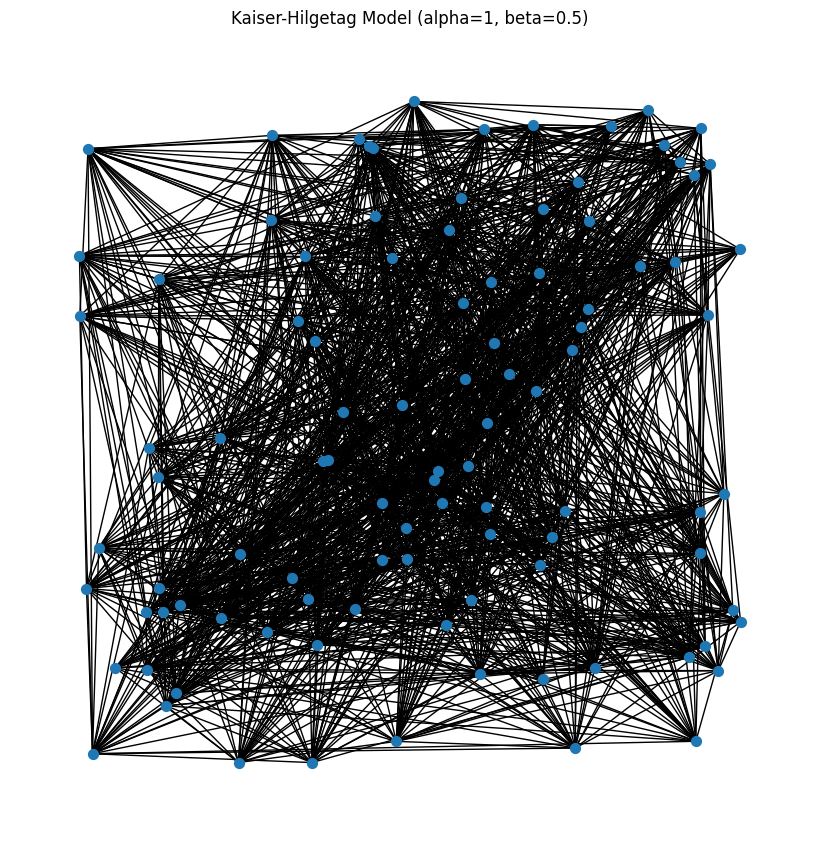

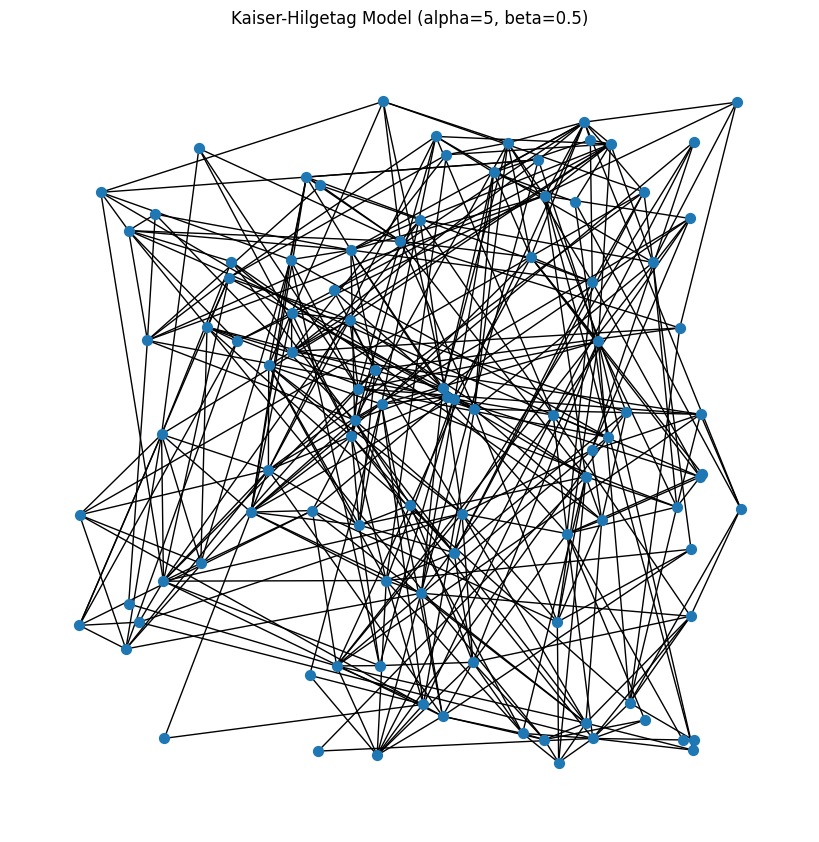

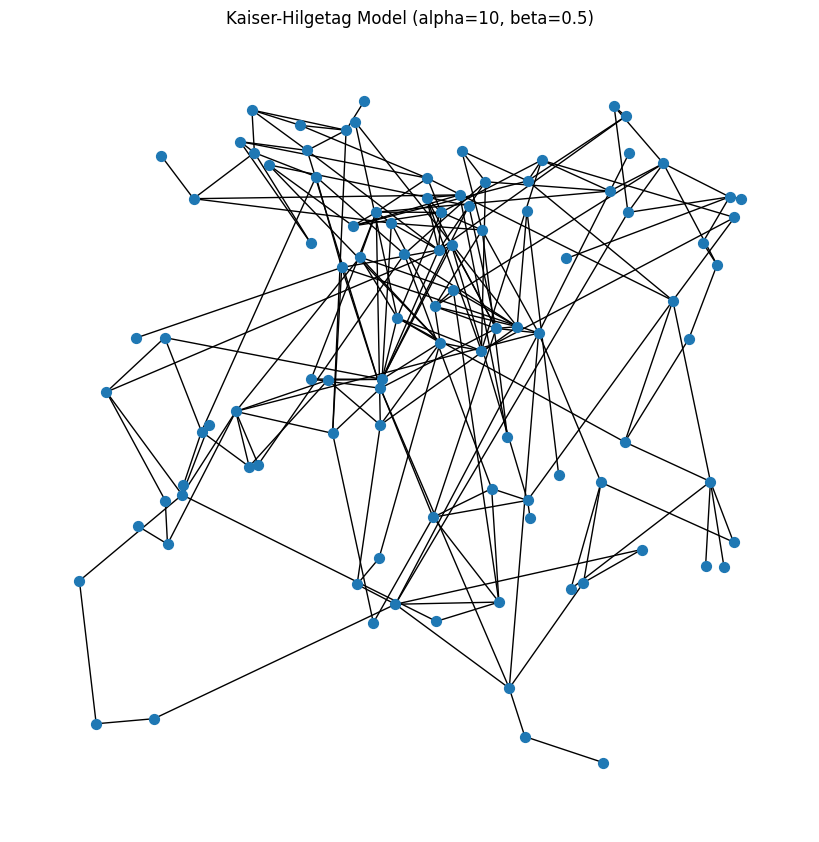

In [3]:
results = [
    KaiserHilgetag(alpha=1, beta=0.5, N=100),
    KaiserHilgetag(alpha=5, beta=0.5, N=100),
    KaiserHilgetag(alpha=10, beta=0.5, N=100)
]
alpha_values = [1, 5, 10]

def plot_graph(G, positions, title="Graph"):
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos={j: positions[j] for j in range(len(positions))}, node_size=50, with_labels=False)
    plt.title(title)

def plot_adjacency_matrix(adjacency, title="Adjacecncy Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(adjacency)
    plt.title(title)
    plt.xlabel('Neuron Index')
    plt.ylabel('Neuron Index')
    plt.colorbar(label='Connection Presence')

for i, (adjacency, positions) in enumerate(results):
    G = nx.from_numpy_array(adjacency)
    plot_graph(G, positions, title=f'Kaiser-Hilgetag Model (alpha={ alpha_values[i] }, beta=0.5)')
    plt.show()


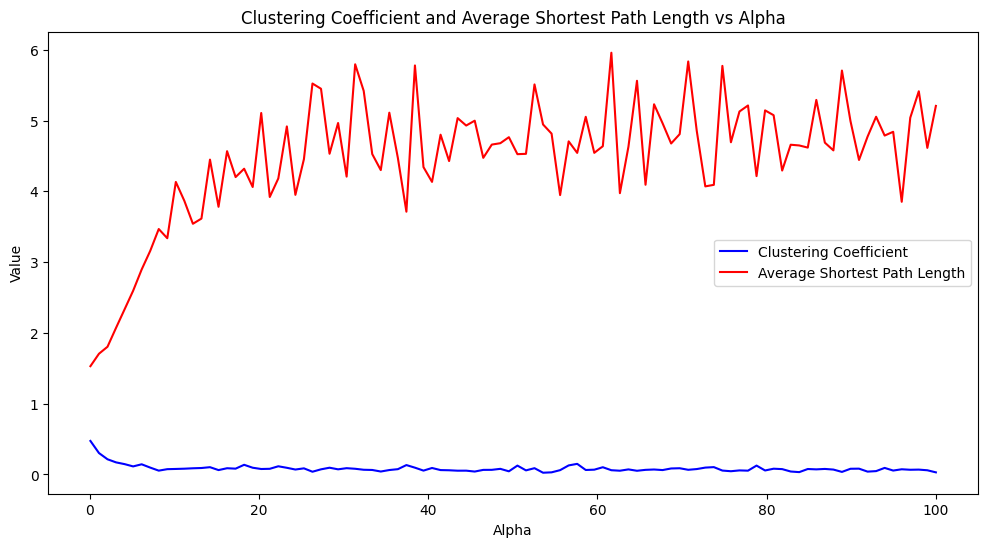

In [4]:
cluster_coefficients = []
average_shortest_paths = []
alphas = np.linspace(0.1, 100, 100)

for i, alpha in enumerate(alphas):
    print(f'Calculating for alpha {i+1}/{len(alphas)}', end='\r')
    adjacency, _ = KaiserHilgetag(alpha=alpha, beta=0.5, N=100)
    G = nx.from_numpy_array(adjacency)
    cluster_coefficients.append(nx.average_clustering(G))
    
    average_shortest_paths.append(nx.average_shortest_path_length(G))

plt.figure(figsize=(12, 6))
plt.plot(alphas, cluster_coefficients, label='Clustering Coefficient', color='blue')
plt.plot(alphas, average_shortest_paths, label='Average Shortest Path Length', color='red')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Clustering Coefficient and Average Shortest Path Length vs Alpha')
plt.legend()
plt.show()


# Task 2

In [5]:
# TASK 2.1

def ImprovedAlgorithmEfficient(alpha=1, N=100):
    positions = [(rng(), rng()) for _ in range(N)]
    # distances = np.fromfunction(lambda i, j: dist(positions[i], positions[j]), (N, N), dtype=int)
    distances = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distances[i, j] = dist(positions[i], positions[j])
    rho = 0.1
    N2 = N*(N-1)

    edges = 0
    
    adjacency = np.zeros((N, N))
    probabilities = p2(distances, alpha)
    probabilities /= np.sum(probabilities)
    i = 0

    while edges < N2 * rho:
        # print("Iteration ", i)
        i+=1
        rng_matrix = np.random.random((N, N))
        # rng_matrix = rng()
        
        new_edges = (rng_matrix < probabilities)
        if edges + np.sum(new_edges) > N2 * rho:
            diff = np.ceil(N2 * rho - edges)
            new_edges_flat = new_edges.flatten()
            indices = np.where(new_edges_flat)[0]
            selected_indices = np.random.choice(indices, size=int(diff), replace=False)
            new_edges_flat[:] = 0
            new_edges_flat[selected_indices] = 1
            new_edges = new_edges_flat.reshape((N, N))

        edges += np.sum(new_edges)

        adjacency += new_edges
    # print(f"Total edges created: {edges} checksum : {np.sum(adjacency)} and wanted : {N2 * rho}")

    return adjacency, positions

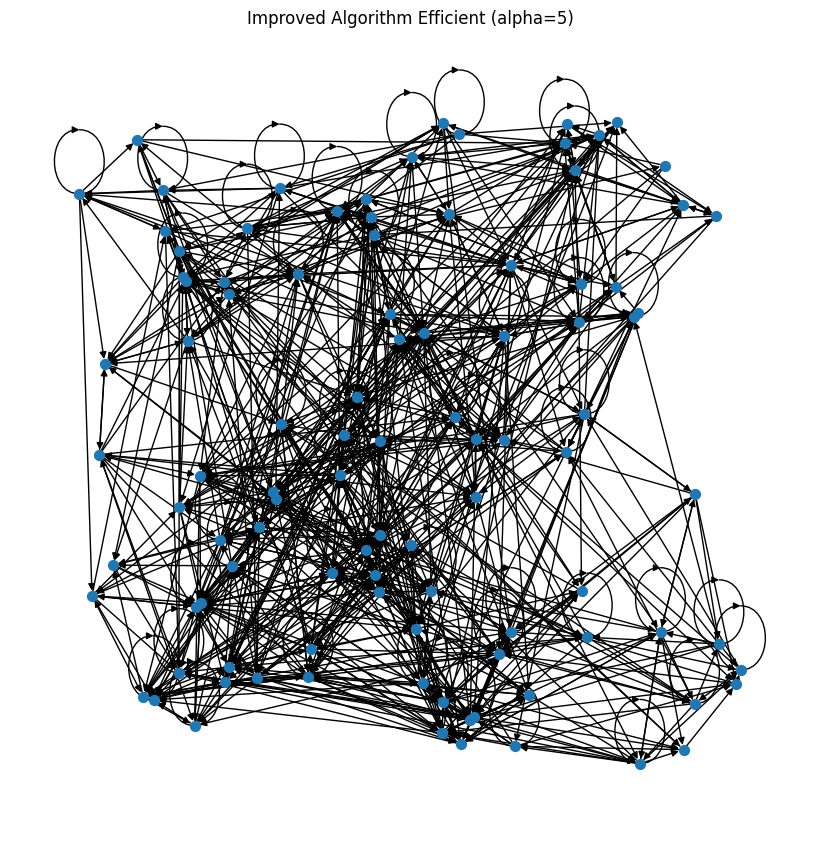

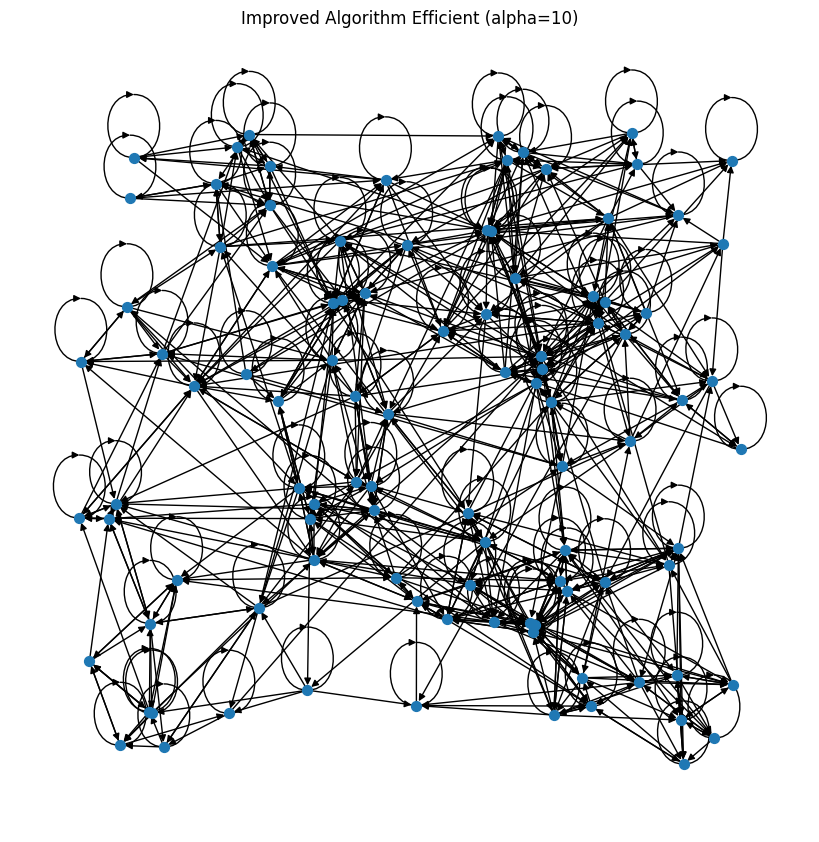

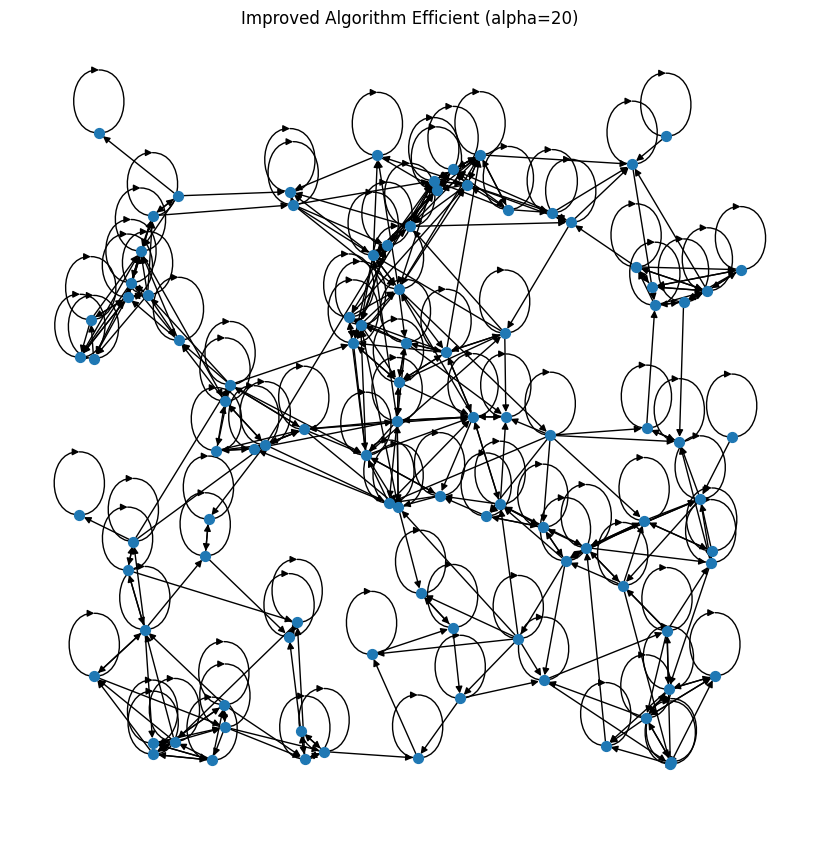

In [6]:
# TASK 2.2

results = [
    ImprovedAlgorithmEfficient(alpha=5, N=100),
    ImprovedAlgorithmEfficient(alpha=10, N=100),
    ImprovedAlgorithmEfficient(alpha=20, N=100)
]

for i, (adjacency, positions) in enumerate(results):
    G = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)
    plot_graph(G, positions, title=f'Improved Algorithm Efficient (alpha={ [5,10,20][i] })')
    plt.show()


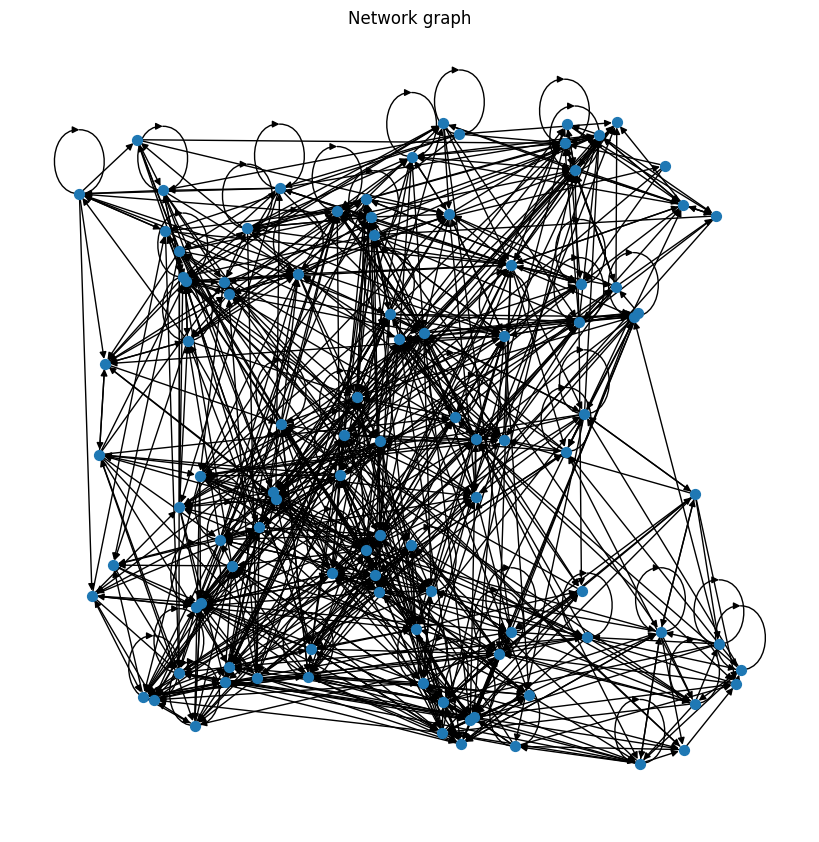

In [7]:
a,b = results[0]

G = nx.from_numpy_array(a, create_using=nx.DiGraph)
plt.figure(figsize=(8, 8))
nx.draw(G, pos={j: b[j] for j in range(len(b))}, node_size=50, with_labels=False)
plt.title("Network graph")
plt.show()

In [9]:
def avg_shortest_path_length_directed(G):
    lens = []
    for u in G.nodes():
        for v in G.nodes():
            if u != v:
                if nx.has_path(G,u,v):
                    l = nx.shortest_path_length(G,u,v,weight="dist")
                    #l = nx.shortest_path_length(G,u,v)
                    lens.append(l)
    n=len(lens)
    print(sum(lens)/n)

2.3006060606060608pha 1/200
2.286767676767677lpha 2/200
2.3053535353535355pha 3/200
2.311717171717172lpha 4/200
2.3155555555555556pha 5/200
2.3647474747474746pha 6/200
2.3601673298642996pha 7/200
2.3895959595959595pha 8/200
2.383131313131313lpha 9/200
2.4105050505050505pha 10/200
2.4691919191919194pha 11/200
2.5320885623915927pha 12/200
2.4923987348229772pha 13/200
2.6596969696969697pha 14/200
2.595858585858586lpha 15/200
2.702020202020202lpha 16/200
2.8314457708397103pha 17/200
2.7936945209672484pha 18/200
2.8854545454545453pha 19/200
2.9736363636363636pha 20/200
3.1512121212121214pha 21/200
3.205050505050505lpha 22/200
3.297878787878788lpha 23/200
3.2234360507059674pha 24/200
3.4447474747474747pha 25/200
3.5237373737373736pha 26/200
3.5848706585592085pha 27/200
3.6343775762572137pha 28/200
3.815056250657134lpha 29/200
3.952759922456892lpha 30/200
4.16314419573139alpha 31/200
3.984264014861764lpha 32/200
4.581838796124511lpha 33/200
4.535050993022008lpha 34/200
4.16643291257597alpha 3

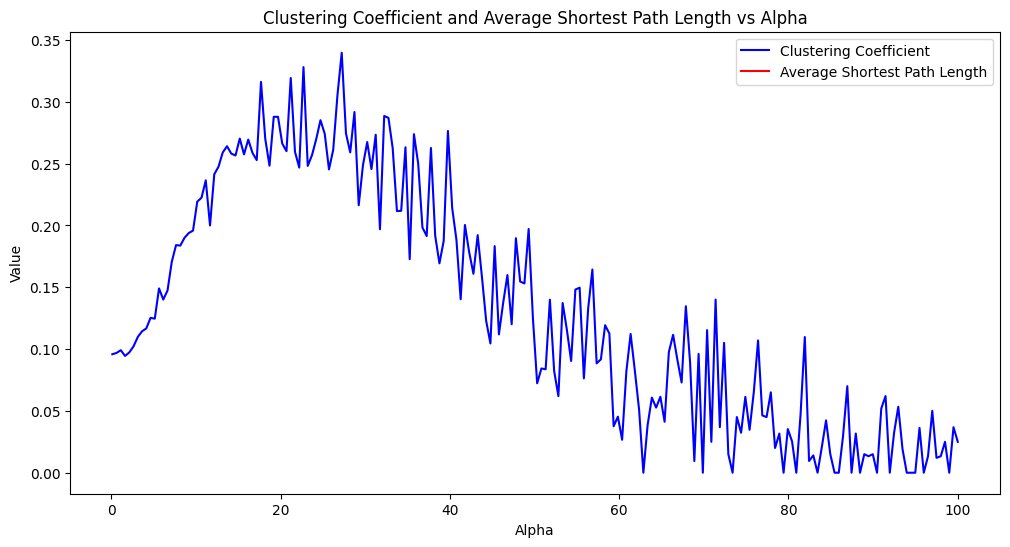

In [11]:
cluster_coefficients = []
average_shortest_paths = []
alphas = np.linspace(0.1, 100, 200)

for i, alpha in enumerate(alphas):
    print(f'Calculating for alpha {i+1}/{len(alphas)}', end='\r')
    adjacency, _ = ImprovedAlgorithmEfficient(alpha=alpha, N=100)
    G = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)

    cluster_coefficients.append(nx.average_clustering(G))
    average_shortest_paths.append(avg_shortest_path_length_directed(G))

plt.figure(figsize=(12, 6))
plt.plot(alphas, cluster_coefficients, label='Clustering Coefficient', color='blue')
plt.plot(alphas, average_shortest_paths, label='Average Shortest Path Length', color='red')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Clustering Coefficient and Average Shortest Path Length vs Alpha')
plt.legend()
plt.show()


# Task 3

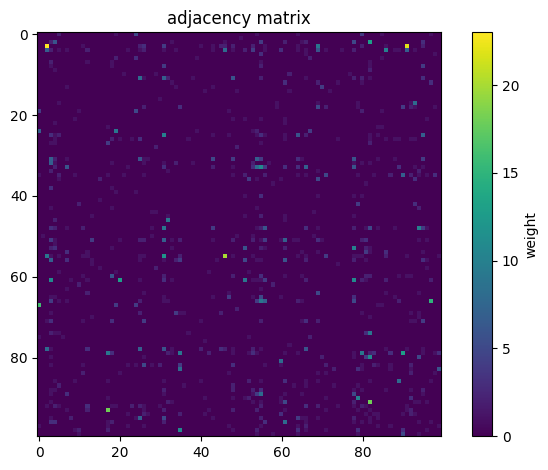

In [13]:
mouse = np.load("data/mouse_V1_adjacency_matrix.npy")
#print(mouse.shape)

plt.figure()
plt.imshow(mouse)
plt.title("adjacency matrix")
plt.colorbar(label="weight")
plt.tight_layout()

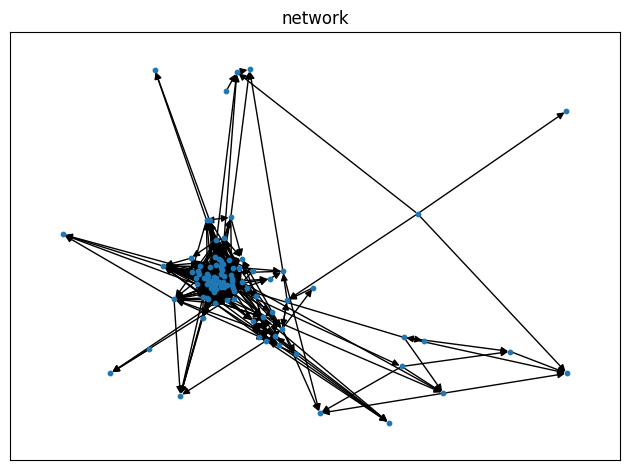

In [14]:
G = nx.from_numpy_array(mouse, create_using=nx.DiGraph)

plt.figure()

position = nx.spring_layout(G,seed=0)
nx.draw_networkx(G,pos=position,node_size=10,with_labels=False)
plt.title("network")
plt.tight_layout()
plt.show()   

In [15]:
c = nx.average_clustering(G)
print(c)

0.22784965779174798


In [16]:
avg_shortest_path_length_directed(G)

2.636455440545317


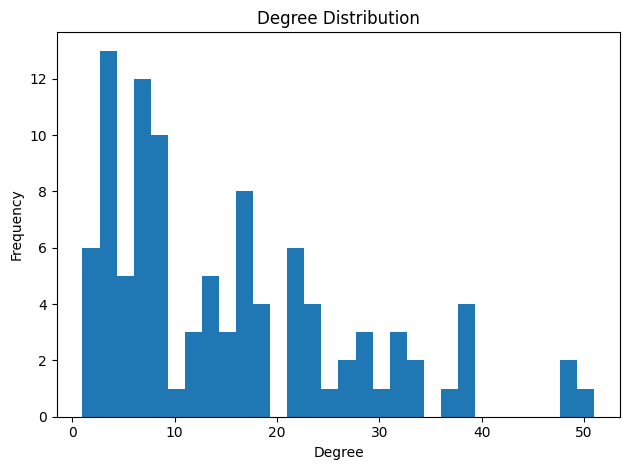

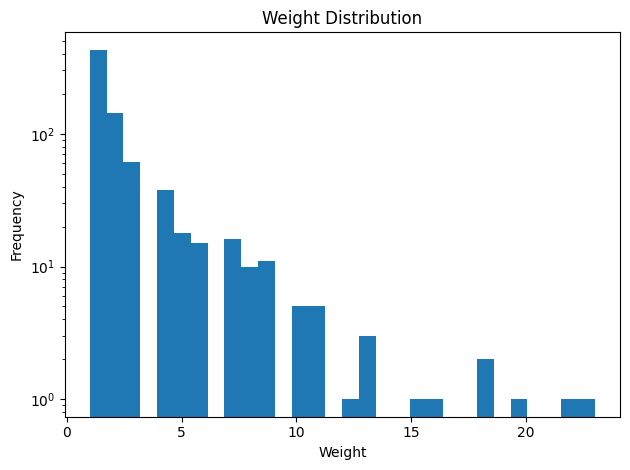

In [17]:
#weight and degree distributions
degrees = [val for (_, val) in G.degree()]
plt.figure()
plt.hist(degrees, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

weights = [data['weight'] for (_, _, data) in G.edges(data=True)]
plt.figure()
plt.hist(weights, bins=30)      
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.yscale("log")

plt.tight_layout()
plt.show()

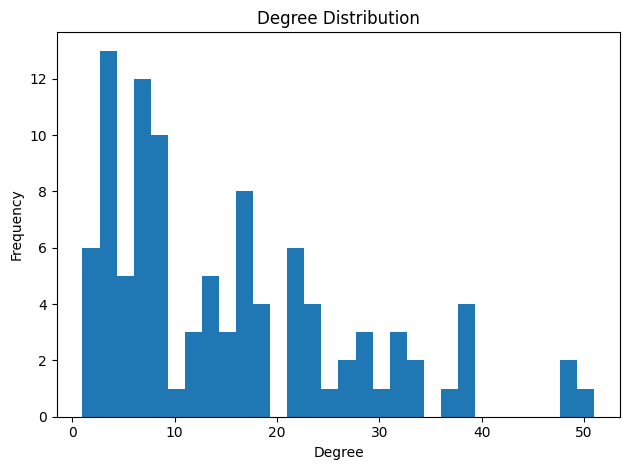

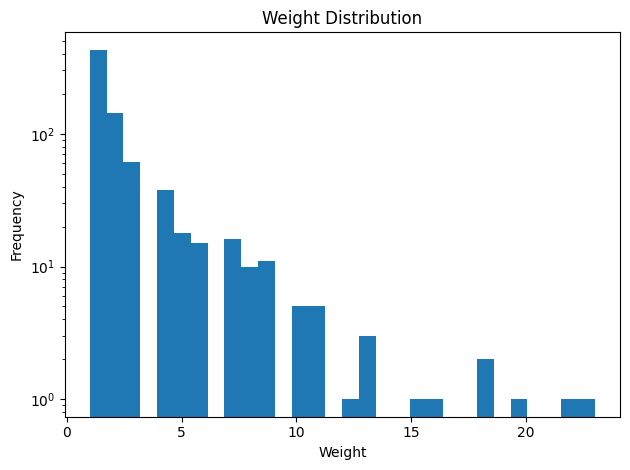

In [ ]:
#weight and degree distributions
degrees = [val for (_, val) in G.degree()]
plt.figure()
plt.hist(degrees, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

weights = [data['weight'] for (_, _, data) in G.edges(data=True)]
plt.figure()
plt.hist(weights, bins=30)      
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.yscale("log")

plt.tight_layout()
plt.show()